### Análisis y Predicción de Precios de Autos (Core)
* Objetivo: Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

In [ ]:
# Se cargan las bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [ ]:
# Se usa biblioteca google para poder usar archivos.
from google.colab import drive
# Se conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se carga el conjunto de datos
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/Automobile_data.csv"
df = pd.read_csv(path)

#### Se Realiza Análisis Exploratorio de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
pd.options.display.max_columns=40

In [ ]:
df.columns = df.columns.str.lower().str.strip().str.replace("-", "_")

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.describe().round(2)

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,25.22,30.75
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,3.97,6.54,6.89
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,13.00,16.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,19.00,25.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,24.00,30.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,30.00,34.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,49.00,54.00


In [ ]:
df.dtypes

,0
symboling,int64
normalized_losses,object
make,object
fuel_type,object
aspiration,object
num_of_doors,object
body_style,object
drive_wheels,object
engine_location,object
wheel_base,float64


In [ ]:
# Se revisa si hay duplicados
df.duplicated().sum()

np.int64(0)

#### Sin nulos

In [ ]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2])

#### Columna que mide el grado de riesgo de los vehiculos  

In [ ]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df["fuel_type"].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
df["num_of_doors"].unique()

array(['two', 'four', '?'], dtype=object)

#### Se encuentra un valor sospechoso en num_of_doors

In [ ]:
df[df["num_of_doors"] == "?"]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [ ]:
# Se filtra por body_style, por drive_wheels, por num_of_cylinders, por engine_type, porque muestran los mismos valores para cada columna
df[(df["body_style"] == 'sedan') & (df["drive_wheels"] == 'fwd') & (df["num_of_cylinders"] == 'four') & (df["engine_type"]== 'ohc')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
20,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
35,0,110,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,54.5,2010,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295
39,0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,2372,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295
41,0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2465,ohc,four,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,169.1,66.0,51.0,2293,ohc,four,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345


In [ ]:
# Se obtiene la moda de la columna 'num_of_doors' que tiene solo dos valores 'two' o 'four', aplicando el filtro anterior
mode_nd = df[(df["body_style"] == 'sedan') & (df["drive_wheels"] == 'fwd') & (df["num_of_cylinders"] == 'four') & (df["engine_type"]== 'ohc')]["num_of_doors"].mode()[0]
print(mode_nd)

four


In [ ]:
# Se asigna la moda a la columna 'num_of_doors' con los valores '?'
df.loc[(df["body_style"] == 'sedan') & (df["drive_wheels"] == 'fwd') & (df["num_of_cylinders"] == 'four') & (df["engine_type"]== 'ohc'), 'num_of_doors'] = mode_nd

In [ ]:
df["num_of_doors"].unique()

array(['two', 'four'], dtype=object)

#### Se comprueba que la columna 'normalized_losses' que representa la depreciación del vehículo esta de tipo object

In [ ]:
df["normalized_losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df[df["normalized_losses"] == '?']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [ ]:
df[df["make"] == 'alfa-romero']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


#### Se verifica que las columnas 'fuel_type', 'aspiration', 'num_of_doors', 'drive_wheels', 'engine_location' coinciden los datos, Por lo tanto se supone que los que tengan estas caracteristicas iguales, tendran el mismo valor de depreciación.
#### Se le asignara la moda a los datos '?' de la columna 'normalized_losses', a partir de un filtro de estas columnas.

In [ ]:
df[(df["fuel_type"] == 'gas') & (df["aspiration"] == 'std') & (df["num_of_doors"] == 'two') & (df["drive_wheels"]== 'rwd') & (df["engine_location"]== 'front')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048
49,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845


In [ ]:
mode_nl = df[(df["fuel_type"] == 'gas') & (df["aspiration"] == 'std') & (df["num_of_doors"] == 'two') & (df["drive_wheels"]== 'rwd') & (df["engine_location"]== 'front')]["normalized_losses"].mode()[0]
print(mode_nl)

?


####  Al calcula la moda con el filtro dado, de obtuvo el valor '?' , se decide tomar la moda de la columna ahora sin filtro.

In [ ]:
mode_nl = df["normalized_losses"].mode()[0]
print(mode_nl)

?


#### Se obtiene nuevamente el mismo valor como moda, se decide dejar el valor y no imputarlo, ademas la columna es de tipo object.

In [ ]:
df["body_style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df["drive_wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df["engine_location"].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df["wheel_base"].value_counts()

,count
wheel_base,
94.5,21
93.7,20
95.7,13
96.5,8
98.4,7
97.3,7
96.3,6
107.9,6
99.1,6


In [ ]:
df["length"].value_counts()

,count
length,
157.3,15
188.8,11
186.7,7
166.3,7
171.7,7
...,...
181.5,1
181.7,1
159.3,1


In [ ]:
df["width"].value_counts()

,count
width,
63.8,24
66.5,23
65.4,15
63.6,11
64.4,10
68.4,10
64.0,9
65.5,8
65.2,7


In [ ]:
df["height"].value_counts()

,count
height,
50.8,14
52.0,12
55.7,12
54.5,10
54.1,10
55.5,9
56.7,8
54.3,8
52.6,7


In [ ]:
df["curb_weight"].value_counts()

,count
curb_weight,
2385,4
1918,3
1989,3
2275,3
2191,2
...,...
2952,1
3049,1
3012,1


In [ ]:
df["engine_type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
df[df["engine_type"] == 'l']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
107,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3020,l,four,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
108,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
109,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3230,l,four,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440
110,0,?,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.7,3.52,21.0,95,4150,25,25,13860
111,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580
112,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.7,3.52,21.0,95,4150,28,33,16900
113,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695
114,0,?,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3485,l,four,152,idi,3.7,3.52,21.0,95,4150,25,25,17075
115,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630


#### Se  verifico valor de columna 'engine_type' y se encuentra que son varias  filas con este valor, se supone que es parte de los valores de la columna.

In [ ]:
df["num_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df["engine_size"].value_counts()

,count
engine_size,
122,15
92,15
97,14
98,14
108,13
110,12
90,12
109,8
120,7


In [ ]:
df["fuel_system"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
df["bore"].value_counts()

,count
bore,
3.62,23
3.19,20
3.15,15
3.03,12
2.97,12
3.46,9
3.31,8
3.43,8
3.78,8


In [ ]:
df[df["bore"] == '?']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


### Se filtra por la marca mazda y se verifica que los 4 registros contienen '?' en columna 'bore' y 'broke', se decide imputarlos por la moda de cada columna con filtro de la marca mazda., pero antes se pasan a nulos y se cambia el tipo de dato a float.

In [ ]:
df[df["make"] == 'mazda']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [ ]:
df.loc[(df["make"] == 'mazda') & (df["bore"] == '?'), 'bore'] = np.nan
df.loc[(df["make"] == 'mazda') & (df["stroke"] == '?'), 'stroke'] = np.nan

In [ ]:
df["bore"] = df["bore"].astype(float)
df["stroke"] = df["stroke"].astype(float)

In [ ]:
df[df["make"] == 'mazda']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [ ]:
mode_bore = df[(df["make"] == 'mazda')]["bore"].mode()[0]
mode_stk = df[(df["make"] == 'mazda')]["stroke"].mode()[0]
df.loc[(df["make"] == 'mazda') & (df["bore"].isna()), 'bore'] = mode_bore
df.loc[(df["make"] == 'mazda') & (df["stroke"].isna()), 'stroke'] = mode_stk


In [ ]:
df[df["make"] == 'mazda']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.39,3.39,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.39,3.39,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.39,3.39,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.39,3.39,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [ ]:
df["compression_ratio"].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [ ]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [ ]:
df[df["horsepower"] == '?']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
df[df["make"] == 'renault']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
# Se crea el  filtro con las columnas 'engine_type', 'num_of_cylinders' y 'fuel_system'
df[(df["engine_type"] == 'ohc') & (df["num_of_cylinders"] == 'four') &  (df["fuel_system"] == 'mpfi')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925
23,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.60,102,5500,24,30,7957
27,1,148,dodge,gas,turbo,four,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.60,102,5500,24,30,8558
41,0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2465,ohc,four,110,mpfi,3.15,3.58,9.00,101,5800,24,28,12945
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.00,120,5000,19,27,18280
75,1,?,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.00,175,5000,19,24,16503
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.50,143,5500,19,27,22018
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.70,?,?,23,31,9295


#### Se deduce que comparten los mismos datos, que las columnas con '?' y se procede a imputar los '?' y calcular la moda, para la columna 'horsepower' y  'peak_rpm', luego se pasaran a tipo float.

In [ ]:
df.loc[(df["make"] == 'renault') & (df["horsepower"] == '?'), 'horsepower'] = np.nan
df.loc[(df["make"] == 'renault') & (df["peak_rpm"] == '?'), 'peak_rpm'] = np.nan

In [ ]:
df["horsepower"] = df["horsepower"].astype(float)
df["peak_rpm"] = df["peak_rpm"].astype(float)

In [ ]:
mode_hp = df[(df["engine_type"] == 'ohc') & (df["num_of_cylinders"] == 'four') & (df["fuel_system"] == 'mpfi')]["horsepower"].mode()[0]
mode_rpm = df[(df["engine_type"] == 'ohc') & (df["num_of_cylinders"] == 'four') &  (df["fuel_system"] == 'mpfi')]["peak_rpm"].mode()[0]
df.loc[(df["make"] == 'renault') & (df["horsepower"].isna()), 'horsepower'] = mode_hp
df.loc[(df["make"] == 'renault') & (df["peak_rpm"].isna()), 'peak_rpm'] = mode_rpm


In [ ]:
df["city_mpg"].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33])

In [ ]:
df["highway_mpg"].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46])

In [ ]:
df["price"].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [ ]:
df[df["price"] == '?']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,?
44,1,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,?


In [ ]:
df.loc[df["price"] == '?', 'price'] = np.nan

In [ ]:
df[df["body_style"] == 'hatchback']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,6295
21,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2414,ohc,four,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,9988
177,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458,ohc,four,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,11248
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.30,161.0,5200.0,20,24,16558
179,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.30,161.0,5200.0,19,24,15998


#### Para el valor '?' en el precio de marca audi y porsche y columna body_style con valores hatchback, se imputa con el mayor precio de los vehiculos hatchback

In [ ]:
# se llenan los valores '?' en la columna precio con nulos
df.loc[(df["body_style"] == 'hatchback') & (df["price"] == '?'), 'price'] = np.nan


In [ ]:
# Se cambia el tipo de dato a float
df["price"] = df["price"].astype(float)

In [ ]:
# Se le asigna el precio maximo dentro de tipo hatchback
max_p = df[(df["body_style"] == 'hatchback')]["price"].max()
df.loc[(df["body_style"] == 'hatchback') & (df["price"].isna()), 'price'] = max_p

In [ ]:
df[df["body_style"] == 'hatchback']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,22018.0
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151.0
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,6295.0
21,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2414,ohc,four,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,9988.0
177,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458,ohc,four,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,11248.0
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.30,161.0,5200.0,20,24,16558.0
179,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.30,161.0,5200.0,19,24,15998.0


In [ ]:
df[df["make"] == 'isuzu']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0
44,1,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048.0


#### Se imputaran los datos nulos con el promedio del precio de la marca isuzu

In [ ]:
# Se calcula el promedio del precio de la marca isuzu
pmp_is = df[df["make"] == 'isuzu']["price"].mean().round(0)
df.loc[(df["make"] == 'isuzu') & (df["price"].isna()), 'price'] = pmp_is

In [ ]:
df[df["make"] == 'isuzu']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0
44,1,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,8916.0
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,8916.0
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048.0


In [ ]:
df[df["make"] == 'isuzu']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0
44,1,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,8916.0
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,8916.0
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

#### Se visualizara los datos con gráficos boxplot para encontrar posibles outliers en la variables numericas

In [ ]:
df.dtypes

,0
symboling,int64
normalized_losses,object
make,object
fuel_type,object
aspiration,object
num_of_doors,object
body_style,object
drive_wheels,object
engine_location,object
wheel_base,float64


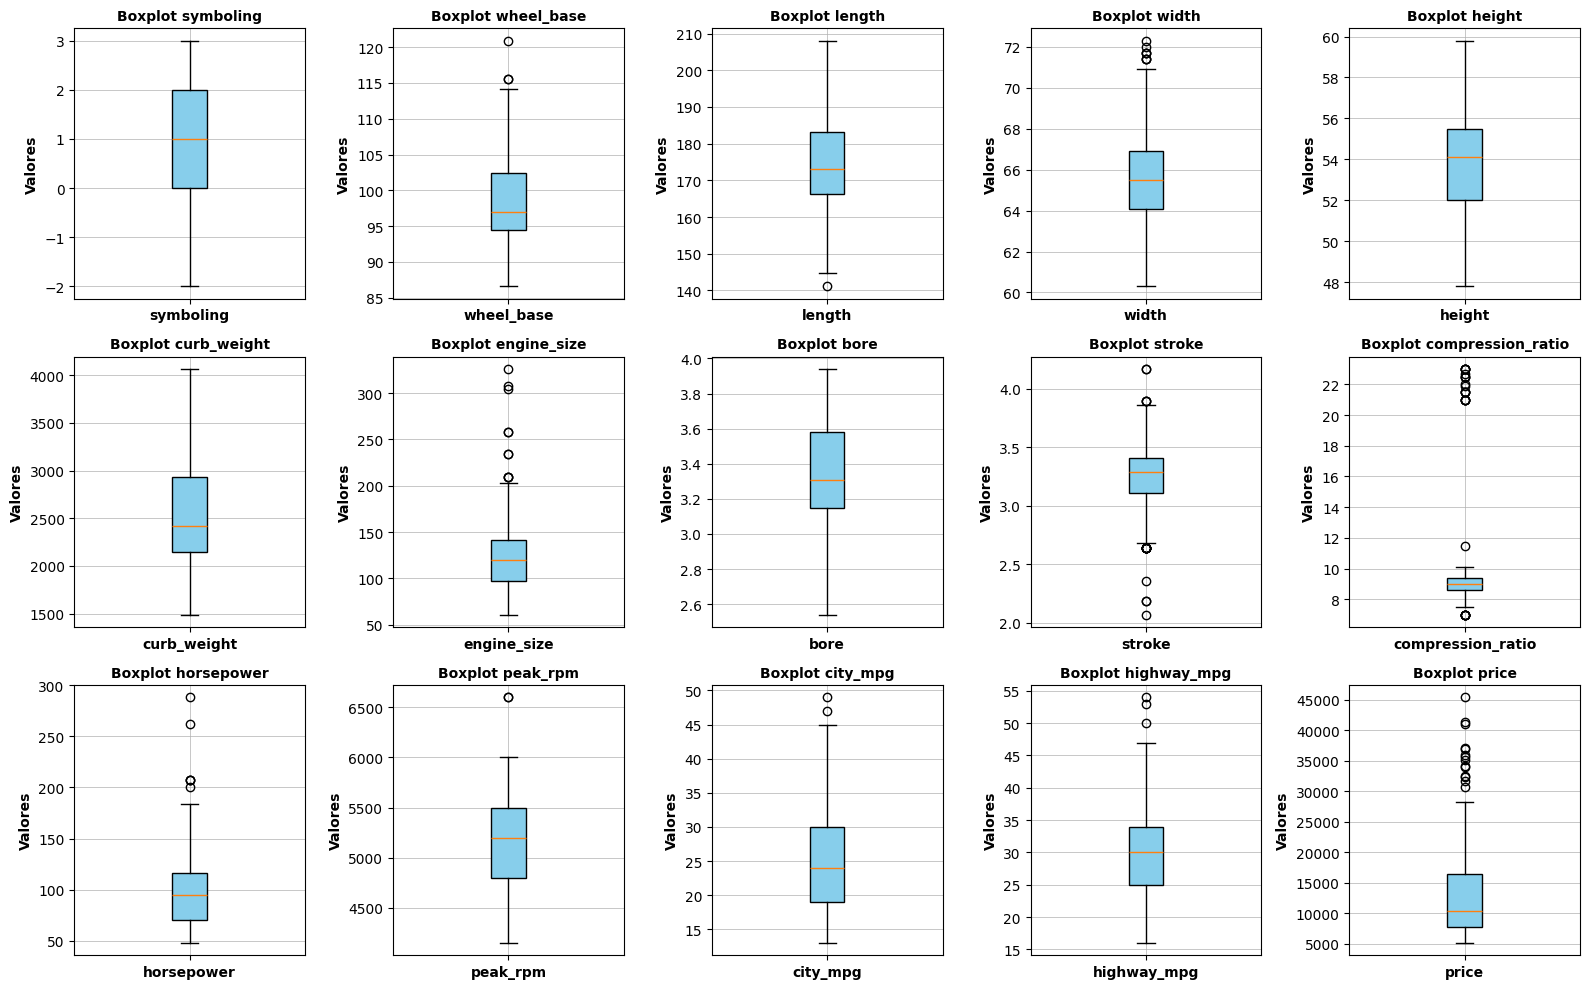

In [ ]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(3,5, figsize=(16, 10))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
numerical_cols = ['symboling', 'wheel_base', 'length', 'width', 'height',
                  'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
                  'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='skyblue')
for i, col in enumerate(numerical_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
df["wheel_base"].value_counts().sort_index(ascending=False)

,count
wheel_base,
120.9,1
115.6,2
114.2,4
113.0,2
112.0,1
110.0,3
109.1,5
108.0,1
107.9,6


In [ ]:
numerical_cols = ['symboling', 'wheel_base', 'length', 'width', 'height',
                  'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
                  'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


#### En columna symboling, bore, height, curb_weight y bore, no hay datos atipicos.

#### En columna wheel_base, se encuentra outliers de 115 y 120. Lo que es perfectamente posible. porque existen seadan con distancia entre ejes de 110 a 130 pulgadas. Se dejaran en la muestra.

#### En columna lenght, se encuentra outliers de 140, lo que es posible en el largo de un vehículo.

####  En columna width, se encuentra outlier a partir de 70, se supone que esta en pulgadas, es posible y bastante comun hoy en dia, en vehiculos.

####  En columna  engine_size encuentra outliers entre 200,300 y  más. Es posible estos valores, si estan en pulgadas cubicas ejem (200 ci), muy comun en motores americanos.

#### En columna stroke se encuentran outliers en el rango de 2 a 2.5 y sobre 4,En el rango de 2 a 2.5 es perfectamente posible en motores pequeños y sobre 4, pensando en pulgadas tambien existe en motores americanos.

#### En columna compression_ratio, se encuentra outliers bajo 8 y sobre 10 y 20. ES posible, pero menos comun en rangos bajo 8 en vehículos modernos. Es posible en vehículos antiguos. Sobre 10 y 20 en motores diesel modernos de alta eficiencia es posible.

#### En columna horsepower se encuentran outliers en el rango de 200 a 300. Esto es totalmente posible en el rango de 200 a 300, sobretodo en la actualidad.

#### En columna peak_rpm se encuentra outiers sobre los 6500. Si es posible que un vehículo tenga revoluciones por minutos sobre los 6500, depende del motor, por ejemplo en motores a gasolina de alta performance.

#### En columna city_mpg se encuentra outliers en el rango de 45 a 50. ESto es completamente posible y común en vehículos modernos que alcancen un consumo de 45 a 50.

#### En columna highway_mpg se encuentra outliers entre 50 y 55. Estos valores esperados para híbridos modernos.
#### En columna price se encuentran varios outliers sobre 30.0000. Estos es absoutamente posible y común. que vehiculos tengan valores muy superiores a 30.000.


### Aunque se encontraron valores atipicos entre las columnas, estos no son valores extraños o errores de la muestra, por lo tanto, no se eliminaran. Asi se tendra predicciones con mayor fidelidad de datos.



#### Se realiza un mapa de correlación para ver las distintas correlaciones entre las columnas numericas

In [ ]:
# Se reviza los datos con la correlaciones de Pearson
# Se filtra solo las columnas numericas

df_numericas =df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numericas.corr(method='pearson')
print(correlation_matrix)

                   symboling  wheel_base    length     width    height  \
symboling           1.000000   -0.531954 -0.357612 -0.232919 -0.541038   
wheel_base         -0.531954    1.000000  0.874587  0.795144  0.589435   
length             -0.357612    0.874587  1.000000  0.841118  0.491029   
width              -0.232919    0.795144  0.841118  1.000000  0.279210   
height             -0.541038    0.589435  0.491029  0.279210  1.000000   
curb_weight        -0.227691    0.776386  0.877728  0.867032  0.295572   
engine_size        -0.105790    0.569329  0.683360  0.735433  0.067149   
bore               -0.122438    0.486025  0.604389  0.558464  0.163661   
stroke              0.005935    0.155838  0.125855  0.181802 -0.069433   
compression_ratio  -0.178515    0.249786  0.158414  0.181129  0.261214   
horsepower          0.071689    0.350787  0.555270  0.642729 -0.110970   
peak_rpm            0.273886   -0.363015 -0.283001 -0.216906 -0.322395   
city_mpg           -0.035823   -0.4704

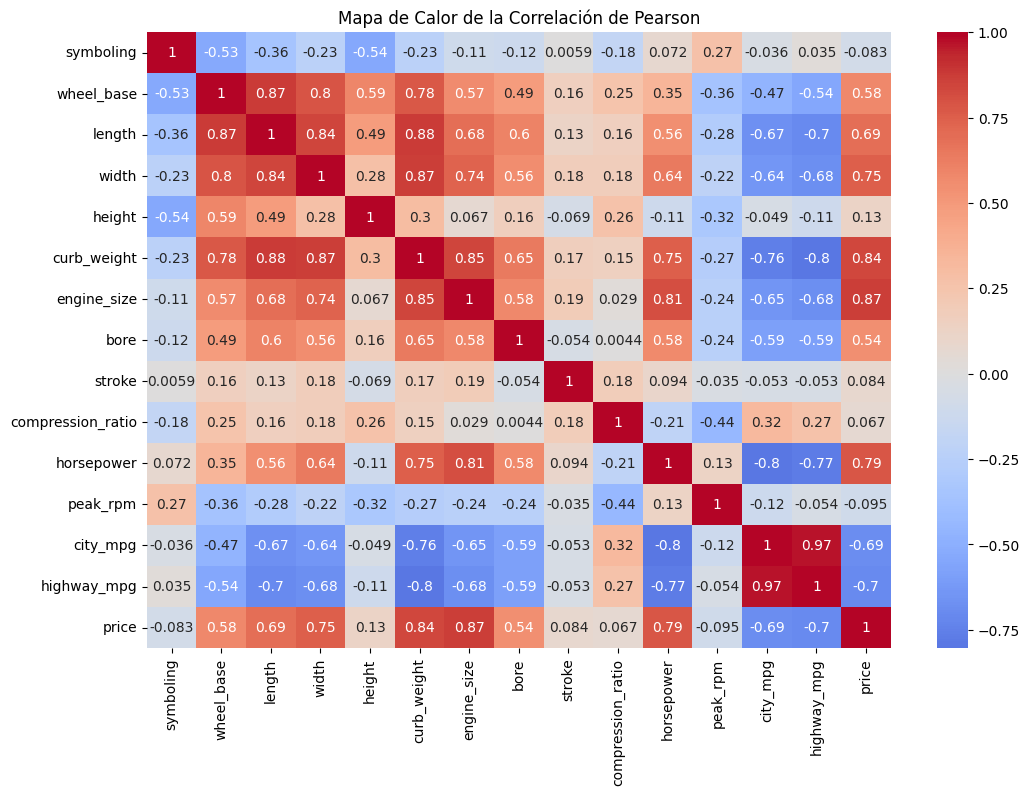

In [ ]:
# Se Crea el  mapas de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

#### Descripción de las columnas.
* symboling : Clasificación de riesgo.
* wheel:base: Distancia entre ejes.
* length:Longitud del vehículo.
* width: Ancho del vehículo.
* height: Altura del vehículo.
* curb_weight: Peso del vehículo en vacio.
* engine_size: Tamaño del motor.
* bore: Diametro del cilindro.
* stroke: Carrera del pistón.
* compression_rate: Tasa de compresíon.
* horsepower: Caballos de fuerza.
* peak_rpm: RPM Máximas.
* city_mpg: Millas por galón en ciudad.
* highway_mpg: Millas por galón en carretera.


#### Correlaciones positivas cercanas a 1        

* weel_base esta correlacionada con length en 0.87, con width en 0.80, con curb_weight en 0.78. La distancia entre ejes está relacionada fuertemente con las dimensiones del vehículo y su peso.

* length esta correlacionada con width en 0.84, con curb_weight en 0.88, con engine_size en 0.68. La longitud del vehículo esta fuertemente relacionada con el ancho, el peso y el tamaño del motor.

* width esta correlacionada con curb_weight en 0.87, con engine_size en 0.74.
  El ancho esta fuertemente relacionado con el peso y el tamaño del motor.

* curb_weight esta correlacionado con engine_size en 0.85, con horsepower en 0.75, con price en 0.84. El peso del vehículo está fuertemente relacionado con el tamaño del motor, con la potencia del vehículo y el precio. Esto quiere decir, que vehículos más pesados, con mayor potencia tienen motores más grandes y por ende, su precio es más alto.    

* engine_size esta correalcionada con horsepower en 0.81, con price en 0.87. El tamaño del motor esta fuertemente relacionado con la potencia y el precio.

* horsepower esta correlacionada con price en 0.79. A mayor caballos de fuerza va asociado con un mayor precio.

* city_mpg esta fuertemente correlacionada con highway_mpg en 0.97. Esta correlación se acerca mas a 1 y es esperable, ya que la eficiencia de combustible en ciudad y carretera estan muy relacionadas.





#### Correlaciones negativas cercanas a -1

* city_mpg y highway_mpg estan inversamente correlacionadas con curb_weight en -0.76 y -0.80, con engine_size en -0.65 y -0.68, con horsepower en -0.80 y -0.77, con price en -0.69 y -0.70. Esto indica que a medida que el peso, el tamaño del motor, la potencia o el precio aumenta, la eficiencia del combustible disminuye.

* wheel_base esta inversamente correlacionada con city_mpg en -0.47, con highway_mpg en -0.54. Esto indica que una mayor distancia entre ejes se asocia con menor eficiencia de combustible.

* length esta inversamente correlacionada con city_mpg en -0.67, con highway_mpg en -0.67. Vehículos más largos tienden a tener menor eficiencia de combustible.



#### Las demas variables muestran correlaciones muy debiles

#### Conclusión

* La longitud, ancho, distancia entre ejes, el peso, el tamaños del motor y la potencia, estan fuertemente correlacionadas entre si y con el precio. Esto indica que vehículos más grandes y pesados suelen tener motores más grandes, más potenentes y son más caros.

* La eficiencia del combustible esta fuertemente correlacionada entre si, pero inversamente con el tamaño, el peso, la potencia y el precio. Los vehículos más grandes y potentes son menos eficientes.


Las variables que estan fuertemente correlacionadas con el precio son engine_size, curb_weight y horsepower.

 #### Preprocesamiento

#### Se aplica los modelos de predición con y sin la columna 'normalized_losses', para comparar cual opcion es más eficiente.

#### Transformación de variables categóricas.

Columna 'num_of_cylinders' se cambiara a numerica

In [ ]:
df["num_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
# Columna 'num_of_cylinders' se cambiara a numerica
cyl = {'two':2,
       'three':3,
       'four':4,
       'five':5,
       'six':6,
       'eight':8,
       'twelve':12
      }
df["num_of_cylinders"] = df["num_of_cylinders"].map(cyl)

In [ ]:
df["num_of_cylinders"].value_counts()

,count
num_of_cylinders,
4,159
6,24
5,11
8,5
2,4
12,1
3,1


In [ ]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [ ]:
# Opcion 1:  Selección todas las variables numéricas
X = df1[['symboling', 'wheel_base', 'length', 'width', 'height',
                  'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio',
                  'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']]
y = df1["price"]


In [ ]:
# Definir las columnas numéricas y categóricas

# Columnas numericas
num_cols = ['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio',
                  'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

# Columnas categoricas con columna 'normalized_losses'.
cat_cols_con_nl = ['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
                   'engine_type', 'fuel_system']

# Columnas categoricas sin columna 'normalized_losses'.
cat_cols_sin_nl = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
                   'engine_type', 'fuel_system']

#### Modelo Regresión lineal con todas las caracteristicas numericas, Opción 1

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba con todas las variables numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Opcion 1:  Selección todas las variables numéricas
X = df1[['symboling', 'wheel_base', 'length', 'width', 'height',
                  'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio',
                  'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']]
y = df1["price"]


In [ ]:
# Crear un ColumnTransformer Modelo Regresion Lineal, Opción 1
preprocessor_rl = ColumnTransformer(transformers=[
     ('scaler', StandardScaler(), num_cols)
     ])

In [ ]:
# Crear un Pipeline completo para Modelo Regresion lineal
pipeline_rl = Pipeline(steps=[
    ('preprocessor', preprocessor_rl),
    ('linear', LinearRegression())
])


In [ ]:
# Entrenar modelo regresión lineal, opcón 1.
pipeline_rl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['symboling', 'wheel_base',
                                                   'length', 'width', 'height',
                                                   'curb_weight',
                                                   'num_of_cylinders',
                                                   'engine_size', 'bore',
                                                   'stroke',
                                                   'compression_ratio',
                                                   'horsepower', 'peak_rpm',
                                                   'city_mpg',
                                                   'highway_mpg'])])),
                ('linear', LinearRegression())])

In [ ]:
# 5. Predecir y evaluar
y_pred_rl = pipeline_rl.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rl)
r2 = r2_score(y_test, y_pred_rl)
print (f"Modelo Regresion lineal con todas las caracteristicas numéricas")
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')


Modelo Regresion lineal con todas las caracteristicas numéricas
Error Cuadrático Medio: 14655734.599001668
R-cuadrado: 0.8173560228486222


#### Modelo Regresión Lineal, Solo con variables numericas, fuertemente correlacionadas con el Precio, Opción 2

In [ ]:
# Se dividen los datos
X = df1[['engine_size', 'curb_weight', 'horsepower']]
y = df1["price"]

In [ ]:
# Columnas fuertemente correlacionadas con la columa Precio.
num_cols_corr = ['engine_size', 'curb_weight', 'horsepower']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Se crea transformador para columnas numericas, Opcion 2
numeric_transformer2 = Pipeline(steps=[
     ('scaler', StandardScaler())
])


In [ ]:
# Se crea ColumnTransformer Modelo Regresion Lineal, Opción 2
preprocessor_rl2 = ColumnTransformer(transformers=[
    ('num', numeric_transformer2, num_cols_corr),
 ])

In [ ]:
# Se crea un Pipeline completo para Modelo Regresion lineal, Opción 2
pipeline_rl2 = Pipeline(steps=[
    ('preprocessor2', preprocessor_rl2),
    ('linear2', LinearRegression())
])


In [ ]:
# Se entrena modelo Regresón Lineal, Opción 2
pipeline_rl2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor2',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['engine_size', 'curb_weight',
                                                   'horsepower'])])),
                ('linear2', LinearRegression())])

In [ ]:
# Se Predice y evalua el Modelo Regresión Lineal, Opción 2
y_pred_rl2 = pipeline_rl2.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rl2)
r2 = r2_score(y_test, y_pred_rl2)
print (f"Modelo Regresion lineal con caracteristicas correlacionadas con el Precio")
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')



Modelo Regresion lineal con caracteristicas correlacionadas con el Precio
Error Cuadrático Medio: 14393303.660831792
R-cuadrado: 0.8206265126320671


* Evaluación: Al aplicar el modelo de regresión lineal con todas las variables numericas, luego solo con las variables fuertemente relacionadas con el target, se obtuvo que este último resulto más eficiente, con MSE de  14393303 y R-cuadrado de 82%.  por lo tanto se deja este modelo con 82% de prediccion.
En cuanto al Error cuadratico medio, tambien se obtuvo un menor error. Esto es porque las variables estan muy correlacionadas con el target.

####  Modelo K-Nearest Neighbors (KNN):

#### Se aplica el modelo con la columna 'normalized_losses' y sin la columna 'normalized_losses'. Puesto que la columna tiene demasiados datos con '?' y no se imputo.

##### Modelo Knn con la columna 'normalized_losses'

In [ ]:
# Se dividen los datos
X1 = df3.drop(columns="price")
y1 = df3["price"]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
preprocessor_knn1_nl = ColumnTransformer(transformers=[
                        ('scaler', StandardScaler(), num_cols),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols_con_nl)
                    ])

# Model knn.
pipeline_knn1 = Pipeline(steps=[
    ("pp1", preprocessor_knn1_nl),
    ("model1", KNeighborsRegressor())
])

In [ ]:
# Entrenamiento knn.
pipeline_knn1.fit(X1_train, y1_train)

Pipeline(steps=[('pp1',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['symboling', 'wheel_base',
                                                   'length', 'width', 'height',
                                                   'curb_weight',
                                                   'num_of_cylinders',
                                                   'engine_size', 'bore',
                                                   'stroke',
                                                   'compression_ratio',
                                                   'horsepower', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['normalized_losses', 'make',
                                                   'fuel_type', 'aspiration',
                                                   'num_of_doors', 'body_style',
                                                   'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'fuel_system'])])),
                ('model1', KNeighborsRegressor())])

In [ ]:
# Prediccion knn.
y_pred_knn1 = pipeline_knn1.predict(X1_test)

##### Modelo Knn sin la columna 'normalized_losses'

In [ ]:
# Se dividen los datos
X2 = df3.drop(columns=["price", "normalized_losses"])
y2 = df3["price"]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# Preprocesador Knn sin columna categorica 'normalized_losses'
preprocessor_knn2_nl = ColumnTransformer(transformers=[
                        ('scaler', StandardScaler(), num_cols),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols_sin_nl)
                    ])

# Model knn.
pipeline_knn2 = Pipeline(steps=[
    ("pp2", preprocessor_knn2_nl),
    ("model2", KNeighborsRegressor())
])

In [ ]:
# Entrenamiento knn.
pipeline_knn2.fit(X2_train, y2_train)

Pipeline(steps=[('pp2',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['symboling', 'wheel_base',
                                                   'length', 'width', 'height',
                                                   'curb_weight',
                                                   'num_of_cylinders',
                                                   'engine_size', 'bore',
                                                   'stroke',
                                                   'compression_ratio',
                                                   'horsepower', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel_type',
                                                   'aspiration', 'num_of_doors',
                                                   'body_style', 'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'fuel_system'])])),
                ('model2', KNeighborsRegressor())])

In [ ]:
# Prediccion knn.
y_pred_knn2 = pipeline_knn2.predict(X2_test)

Evaluación de Knn

In [ ]:
mse1 = mean_squared_error(y1_test, y_pred_knn1)
r2_score_knn1 = r2_score(y1_test, y_pred_knn1)
mse2 = mean_squared_error(y2_test, y_pred_knn2)
r2_score_knn2 = r2_score(y2_test, y_pred_knn2)
print ("n\Modelo Knn con columna normalized_losses")
print(f'Error Cuadrático Medio: {mse1}')
print(f'R-cuadrado: {r2_score_knn1}')
print ("\n Modelo Knn sin columna normalized_losses")
print(f'Error Cuadrático Medio: {mse2}')
print(f'R-cuadrado: {r2_score_knn2}')


n\Modelo Knn con columna normalized_losses
Error Cuadrático Medio: 20140671.29756097
R-cuadrado: 0.7490011651455727

 Modelo Knn sin columna normalized_losses
Error Cuadrático Medio: 22490884.912195124
R-cuadrado: 0.7197121275451417


#### Evaluación
Al comparar la predicción del modelo de las dos formas se obtiene que el error cuadratico medio es menor en la primera forma y el R-cuadrado es mayor. por lo tanto se deja la primera forma con la columna normalized_losses agregada, ya que se obtiene un 74,9% de predicción. Esto indica que la variable normalized_losses aporta información relevante para las predicciones.



#### Modelo  Árbol de Decisión

In [ ]:
# Se dividen los datos
X3 = df3.drop(columns="price")
y3 = df3["price"]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
# Preprocesador Arbol de decisión sin columna categorica 'normalized_losses'
preprocessor_tree3_nl = ColumnTransformer(transformers=[
                        ('scaler', StandardScaler(), num_cols),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols_con_nl)
                    ])

# Modelo Arbol decisión.
pipeline_tree3 = Pipeline(steps=[
    ("pp3", preprocessor_tree3_nl),
    ("model3",  DecisionTreeRegressor())
])

In [ ]:
# Entrenamiento Arbol.
pipeline_tree3.fit(X3_train, y3_train)

Pipeline(steps=[('pp3',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['symboling', 'wheel_base',
                                                   'length', 'width', 'height',
                                                   'curb_weight',
                                                   'num_of_cylinders',
                                                   'engine_size', 'bore',
                                                   'stroke',
                                                   'compression_ratio',
                                                   'horsepower', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['normalized_losses', 'make',
                                                   'fuel_type', 'aspiration',
                                                   'num_of_doors', 'body_style',
                                                   'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'fuel_system'])])),
                ('model3', DecisionTreeRegressor())])

In [ ]:
# Prediccion Arbol.
y_pred_tree3 = pipeline_tree3.predict(X3_test)

In [ ]:
# Metrica Arbol
mse3 = mean_squared_error(y3_test, y_pred_tree3)
r2_score_tree3 = r2_score(y3_test, y_pred_tree3)
print ("n\Modelo Arbol Decisión")
print(f'Error Cuadrático Medio: {mse3}')
print(f'R-cuadrado: {r2_score_tree3}')

n\Modelo Arbol Decisión
Error Cuadrático Medio: 6707827.591463415
R-cuadrado: 0.9164051244873062


#### Evaluación
El modelo de Arbol de Decisión, obtuvo hasta el momento la mayor predicción con un 92% y un error cuadratico medio de 6272125.8. El cual se aplico con todas las caracteristicas categoricas y caracteristicas numericas.

#### Al comparar los tres modelos se puede concluir que el modelo de árbol de decisión es el más adecuado para la predicción de precios de autos, con gran precisión, el cual se aplico con todas las caracteristicas.  

#### Ahora con el uso de hiperparametros en el modelo de Knn y de árbol, se puede obtener mejoras en el rendimiento del modelo aumentando el porcentaje de predicción.

####  Desafíos Adicionales

##### Se Optimizara el modelo de Knn y de Arbol para obtener mejoras en los modelos:

#### Se aplica Gridsearch para encontrar los mejores parametros para modelo Knn

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Preprocesador.
preprocessor_knn4 = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols)
])

# Model.
knn4_pipeline = Pipeline([
    ("pp4", preprocessor_knn4),
    ("model4", KNeighborsRegressor())
])

In [ ]:
# Optimizacion de hiperparametros.
knn_params = {
    "model4__n_neighbors": [2, 3, 5, 10], # El nombre debe coincidir con el nombre del modelo.
}

knn_grid = GridSearchCV(knn4_pipeline, knn_params, cv=3, scoring="r2")
knn_grid.fit(X1_train, y1_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pp4',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['symboling',
                                                                          'wheel_base',
                                                                          'length',
                                                                          'width',
                                                                          'height',
                                                                          'curb_weight',
                                                                          'num_of_cylinders',
                                                                          'engine_size',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression_ratio',
                                                                          'horsepower',
                                                                          'peak_rpm',
                                                                          'city_mpg',
                                                                          'highway_mpg'])])),
                                       ('model4', KNeighborsRegressor())]),
             param_grid={'model4__n_neighbors': [2, 3, 5, 10]}, scoring='r2')

In [ ]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y1_pred_knn4 = knn_best.predict(X1_test)

In [ ]:
print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)
print("R²:", r2_score(y1_test, y1_pred_knn4))

KNN Regressor
Mejores parámetros: {'model4__n_neighbors': 2}
R²: 0.6423968173297236


In [ ]:
preprocessor_knn5 = ColumnTransformer(transformers=[
                        ('scaler', StandardScaler(), num_cols),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols_con_nl)
                    ])

# Model knn.
pipeline_knn5 = Pipeline(steps=[
    ("pp5", preprocessor_knn5),
    ("model5", KNeighborsRegressor(n_neighbors=2))
])

In [ ]:
# Entrenamiento knn.
pipeline_knn5.fit(X1_train, y1_train)

Pipeline(steps=[('pp5',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['symboling', 'wheel_base',
                                                   'length', 'width', 'height',
                                                   'curb_weight',
                                                   'num_of_cylinders',
                                                   'engine_size', 'bore',
                                                   'stroke',
                                                   'compression_ratio',
                                                   'horsepower', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['normalized_losses', 'make',
                                                   'fuel_type', 'aspiration',
                                                   'num_of_doors', 'body_style',
                                                   'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'fuel_system'])])),
                ('model5', KNeighborsRegressor(n_neighbors=2))])

In [ ]:
# Prediccion knn.
y_pred_knn5 = pipeline_knn5.predict(X1_test)

In [ ]:
mse5 = mean_squared_error(y1_test, y_pred_knn5)
r2_score_knn5 = r2_score(y1_test, y_pred_knn5)

print ("n\Modelo Knn con optimizacion parametros")
print(f'Error Cuadrático Medio: {mse5}')
print(f'R-cuadrado: {r2_score_knn5}')


n\Modelo Knn con optimizacion parametros
Error Cuadrático Medio: 9282840.451219512
R-cuadrado: 0.8843145740788787


#### Al optimizar parametro K=2, se obtuvo un error cuadratíco medio de 9282840.4 y un R-cuadrado de 0,88. Esto da una predicción del 88%.

#### El error cuadratico medio es menor al modelor anterior, Con parametro k=2,hubo una mejora sustancial en la predicción del Precio, dando un 88%, muy distinto al modelo anterior Knn de predicción de 74.9% .

#### Se optimizara parametros del modelo de árbol.

In [ ]:
# Preprocesador árbol
preprocessor_tree3 = ColumnTransformer(transformers=[
                        ('scaler', StandardScaler(), num_cols),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols_con_nl)
                    ])

# Modelo árbol.
pipeline_tree3 = Pipeline(steps=[
    ("pp3", preprocessor_tree3),
    ("model3",  DecisionTreeRegressor())
])

In [ ]:
# Optimizacion de hiperparametros.
tree_params = {
     'model3__random_state': [5, 10, 20],
     'model3__max_depth': [5, 10, 15]
}

tree_grid = GridSearchCV(pipeline_tree3, tree_params)
tree_grid.fit(X3_train, y3_train)

GridSearchCV(estimator=Pipeline(steps=[('pp3',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['symboling',
                                                                          'wheel_base',
                                                                          'length',
                                                                          'width',
                                                                          'height',
                                                                          'curb_weight',
                                                                          'num_of_cylinders',
                                                                          'engine_size',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression_ratio',
                                                                          'horsepower',
                                                                          'peak_rpm',
                                                                          'city_mpg',
                                                                          'highway_mpg']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['normalized_losses',
                                                                          'make',
                                                                          'fuel_type',
                                                                          'aspiration',
                                                                          'num_of_doors',
                                                                          'body_style',
                                                                          'drive_wheels',
                                                                          'engine_location',
                                                                          'engine_type',
                                                                          'fuel_system'])])),
                                       ('model3', DecisionTreeRegressor())]),
             param_grid={'model3__max_depth': [5, 10, 15],
                         'model3__random_state': [5, 10, 20]})

In [ ]:
# Evaluación.
tree_best = tree_grid.best_estimator_
y_pred_tree = knn_best.predict(X3_test)

In [ ]:
print("Arbol Decisión")
print("Mejores parámetros:", tree_grid.best_params_)
print("R²:", r2_score(y3_test, y_pred_tree3))

Arbol Decisión
Mejores parámetros: {'model3__max_depth': 10, 'model3__random_state': 20}
R²: 0.9164051244873062


#### Se usa Gridsearch para encontrar mejores parametros para el modelo Arbol de decisión y se obtiene una máxima profundidad de 10 y un ramdom state de 20. lo que da un 91% de predicción.

In [ ]:
preprocessor_tree6_nl = ColumnTransformer(transformers=[
                        ('scaler', StandardScaler(), num_cols),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols_con_nl)
                    ])

# Modelo Arbol decisión.
pipeline_tree6 = Pipeline(steps=[
    ("pp6", preprocessor_tree6_nl),
    ("model6",  DecisionTreeRegressor(max_depth=10, random_state=20))
])


# Entrenamiento Arbol.
pipeline_tree6.fit(X3_train, y3_train)

# Prediccion Arbol.
y_pred_tree6 = pipeline_tree6.predict(X3_test)

In [ ]:
# Metrica Arbol
mse6 = mean_squared_error(y3_test, y_pred_tree3)
r2_score_tree6 = r2_score(y3_test, y_pred_tree3)
print ("n\Modelo Arbol Decisión")
print(f'Error Cuadrático Medio: {mse6}')
print(f'R-cuadrado: {r2_score_tree6}')

n\Modelo Arbol Decisión
Error Cuadrático Medio: 6707827.591463415
R-cuadrado: 0.9164051244873062


#### Feature Engineering

Observando las columnas, se puede hacer varias combinaciones que podrian ser relevantes para predecir el precio.

In [ ]:
# Relación entre dimensiones del vehículo: lenght y width. area y volumne
df3["area"] = df3["length"]*df["width"]
df3["volume"] = df3["length"]*df["width"]*df["height"]

In [ ]:
# Eficiencia del motor: relacion entre la potencia  y el tamaño del motor
df["horsepower_cc"] = df["horsepower"] / df3["engine_size"]

In [ ]:
# diferencia de rendimientos: diferencia entre el rendimineto de carretera y ciudad
df3["mpg_difference"] = df3["highway_mpg"] - df3["city_mpg"]

In [ ]:
df3.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,area,volume,mpg_difference
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,10820.08,528019.904,6
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,10820.08,528019.904,6
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,11213.60,587592.640,7
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,11690.92,634816.956,6
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,11726.24,636734.832,4


#### Se aplica validación cruzada para encontrar el mejor k en modelo de regresión Knn

In [ ]:
# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn4_pipeline, X1_train, y1_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')


Mejor valor de K: 1


#### Informe

#### Al concluir se debe decir que al aplicar a los modelos ciertas carcateristicas se obtuvo distintos resultados, aunque no muy alejados entre ellos.
#### Se separo por caracteristicas numericas y caracteristicas correlacionadas con el target. Ademas en un caso se agrego una columna con datos no imputados y en el otro caso, sin la columna en discusión.
#### El modelo de regresión lineal  obtuvo error cuadratico alto y valores de predicción entre 81% y 82%.
#### El modelo de Arbol Decisión obtuvo valores de predicción entre 90% y 92%, siendo con mayor eficiencia y más alta predicción, con valores de error cuadratico elevados.
 #### El modelo de Regresión Knn, obtuvo valores de predicción entre 71% y 88% con optimizacin de parametros.
 #### Quedan dudas por los errores cuadraticos elevados.


